## GRIP:The Spark foundation  

### Data Science and Business Analytics Intern

### Author: Brijesh Kumar

### Task 6 : Prediction using decision Tree classifier to classifie the Species of iris-flower 

importing the all required library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import the dataset

In [4]:
df=pd.read_csv('C://Users//brije//Downloads/Iris.csv')

Expoloratory data Analysis

In [5]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


we check wetheir our data need cleaning. for that , we plot heatmap for entire dataset,hilighting null value (if any)

<AxesSubplot:>

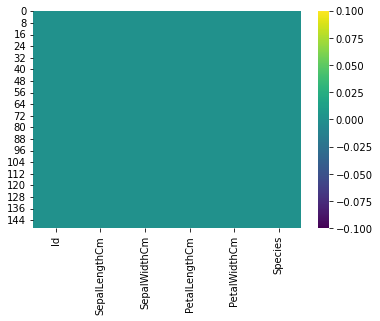

In [10]:
sns.heatmap(df.isnull(),cmap='viridis')

Thus,we can concluded that our dataset doesn't have any Null value hence dataset needn't cleaning.

### Ploting data for visualization

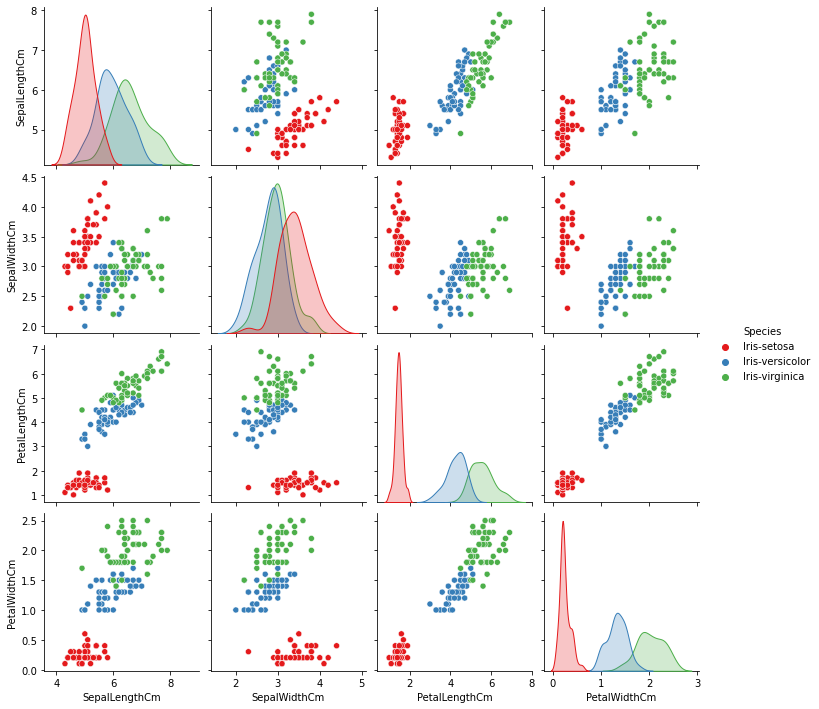

In [16]:
sns.pairplot(data=df,hue='Species',palette='Set1')

pairplot can be very useful to understand the all possible relationship between the features in our dataset.From above pairplot,
we can clearly see that cluster of species that 'versicolor' and 'verginica' are closely related where 'setosa' is more distinct.

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

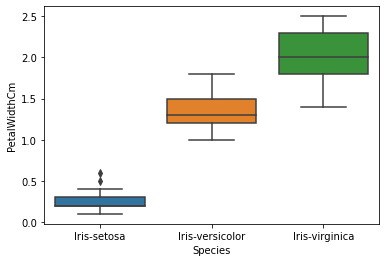

In [19]:
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

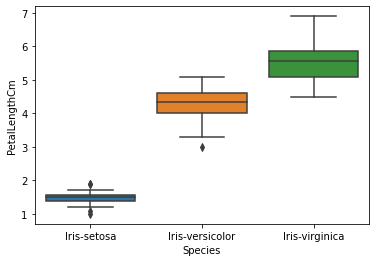

In [21]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

we can plot boxplot using categorical feature against continious features to understand the how our data is distributed over 
defferent feature

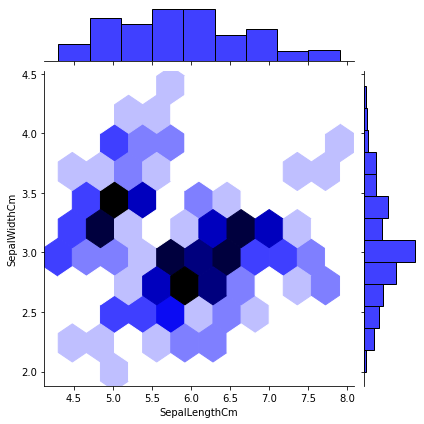

In [22]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='hex',color='blue')

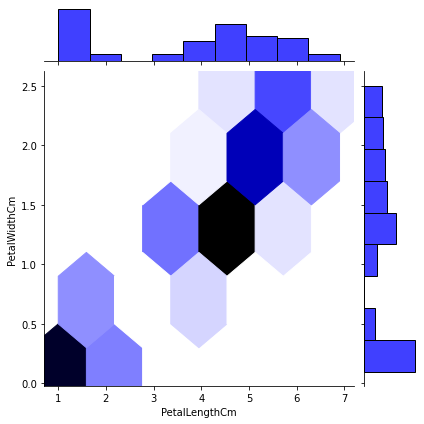

In [23]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=df,kind='hex',color='blue')

from above jointplot , we can find major area of concentration of our data point,darker area of hexagon reffer high concentration while light area of hexagon represent less concetration.


### shuffle of dataset

In [24]:
df=df.sample(frac=1)

In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
53,6.9,3.1,4.9,1.5,Iris-versicolor
135,6.1,2.6,5.6,1.4,Iris-virginica
119,7.7,2.6,6.9,2.3,Iris-virginica
109,6.7,2.5,5.8,1.8,Iris-virginica
83,5.8,2.7,3.9,1.2,Iris-versicolor


Encoding the Target data

In [26]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder=LabelEncoder()


In [27]:
df['Encoded_species']= label_encoder.fit_transform(df['Species'])

In [28]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_species
Id,,,,,,
53,6.9,3.1,4.9,1.5,Iris-versicolor,1
135,6.1,2.6,5.6,1.4,Iris-virginica,2
119,7.7,2.6,6.9,2.3,Iris-virginica,2
109,6.7,2.5,5.8,1.8,Iris-virginica,2
83,5.8,2.7,3.9,1.2,Iris-versicolor,1


Camparing the last column data following are the labels:-
    Iris-setosa = 0
    Iris-versicolor = 1
    Iris-virginica = 2
    
    
    

converting label column in array 

In [30]:
enc_data= label_encoder.fit_transform(df['Species'])
enc_data

array([1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1,
       2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1,
       0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0])

Spliting the data

In [41]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-2].values
x

array([[6.9, 3.1, 4.9, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 2.6, 6.9, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [7. , 3.2, 4.7, 1.4],
       [7.7, 3.8, 6.7, 2.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 2.3, 4. , 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.5, 1.4, 0.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.5, 3. , 5.5, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 3.1, 4.4, 1.4],
       [5. , 3.4, 1.5, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [4.8, 3.1, 1.6, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.1, 2

In [43]:
x.shape

(150, 4)

In [46]:
y=enc_data

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

Building the decision tree model

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
prediction=dtree.predict(x_test)

Model Evaluation

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.82      1.00      0.90         9
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.96      0.96      0.96        45



In [60]:
print(confusion_matrix(y_test,prediction))

[[22  0  0]
 [ 0  9  0]
 [ 0  2 12]]


### visualizing the Decision Tree Model by using sklearn tree

In [64]:
features=list(df.columns[:-2])
targets=list(df['Species'].unique())

In [61]:
from sklearn import tree


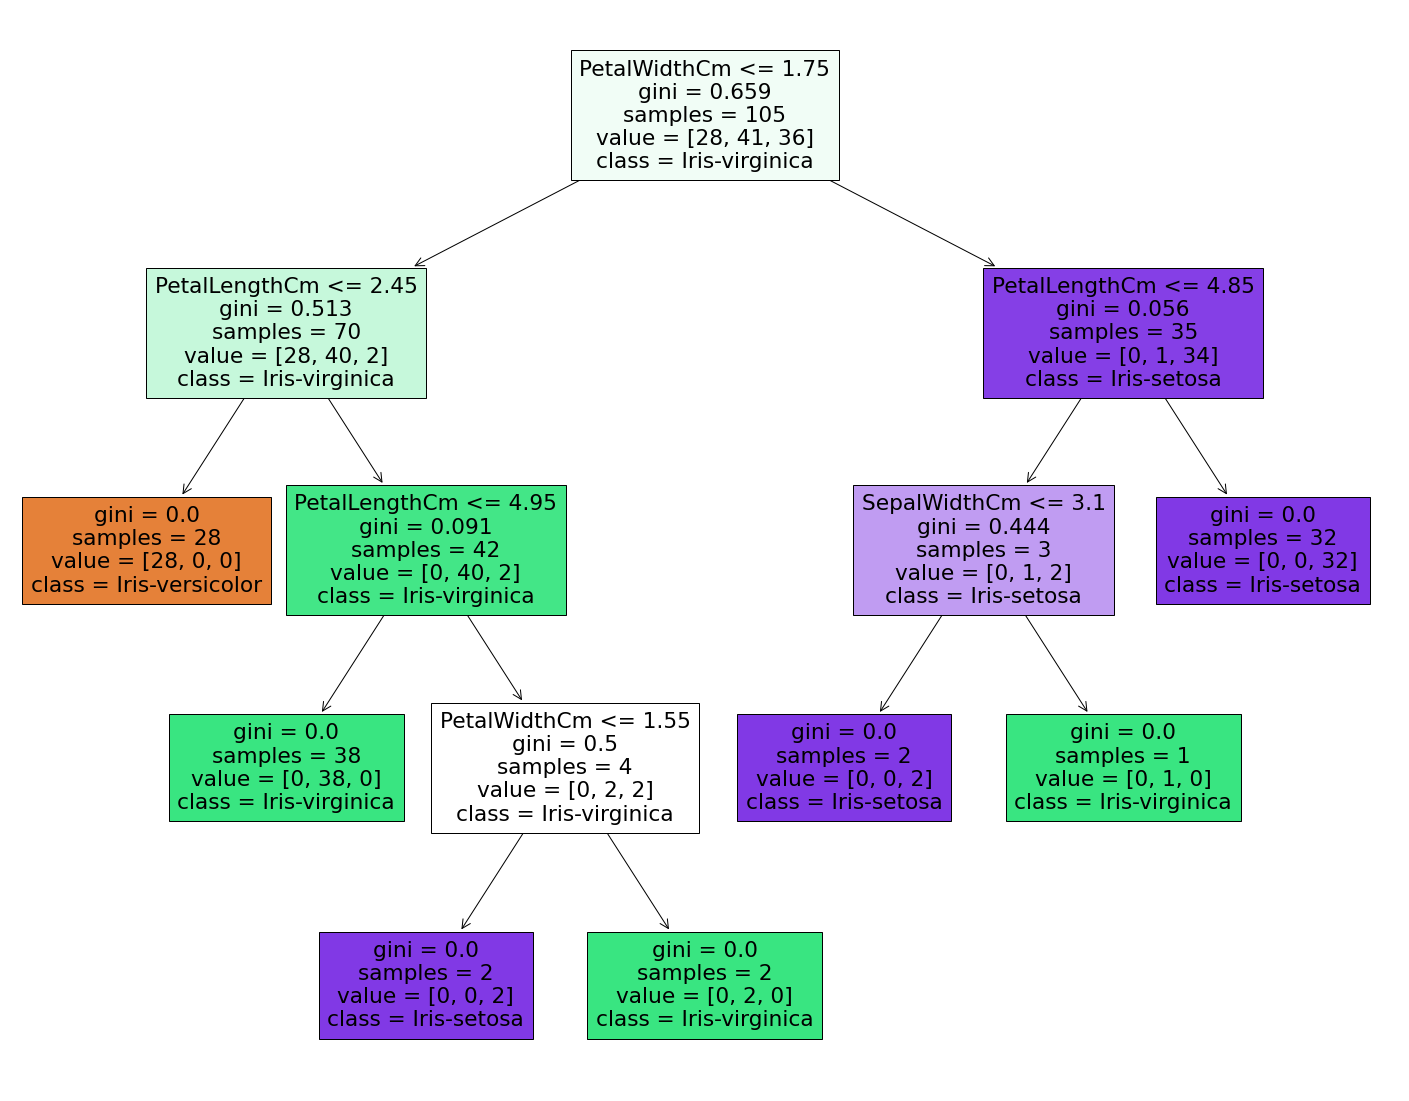

In [65]:
fig=plt.figure(figsize=(25,20))
image=tree.plot_tree(dtree,feature_names=features,
    class_names=targets,
    filled=True)

### Thank You!